In [1]:
import spacy
from newsapi import NewsApiClient

nlp_eng = spacy.load('en_core_web_sm')
newsapi = NewsApiClient (api_key='a14ae82fe9694e75b32ee020ea0619a5')

temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2020-09-28', to='2020-10-01', sort_by='relevancy', page_size=100)
articles = temp['articles']


In [2]:
import pandas as pd

dataset = []

for i in range(100):
    title = articles[i].get("title")
    description = articles[i].get("description")
    content = articles[i].get("content")
    dataset.append({'title':title, 'desc':description, 'content':content})
        
df = pd.DataFrame(dataset)
df = df.dropna()
df.head()

,title,desc,content
0,Coronavirus Briefing: What Happened Today,How close is herd immunity? Despite optimistic...,After months of persistently driving down its ...
1,Coronavirus Deaths Pass One Million Worldwide,"Over the past 10 months, the virus has taken m...","And, crucially, people are most contagious whe..."
2,"Titans, Vikings Experience NFL's First Coronav...",The Tennessee Titans and Minnesota Vikings are...,The Titans outbreak reflects how a bundle of p...
5,N.F.L.’s New Two-Minute Drill: Juggling a Coro...,A spate of infections in the Titans’ clubhouse...,"Still, the Titans positive tests and other inc..."
6,"Zinc: It Helps With Colds, But Not Coronavirus",Maybe! It may help with the common cold. There...,Zinc is the second most common trace mineral i...


In [3]:
from collections import Counter
def get_keywords_eng(text):
    result = []
    content_text = nlp_eng(text)
    pos_tag = ['NOUN', 'PROPN', 'VERB']
    for token in content_text:
        if (token.text in nlp_eng.Defaults.stop_words or token.is_punct):
            continue
        if (token.pos_ in pos_tag):
            result.append(token.text)
    return result

results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])


df['keywords'] = results

df.head()

,title,desc,content,keywords
0,Coronavirus Briefing: What Happened Today,How close is herd immunity? Despite optimistic...,After months of persistently driving down its ...,"[#virus, #months, #driving, #numbers, #New]"
1,Coronavirus Deaths Pass One Million Worldwide,"Over the past 10 months, the virus has taken m...","And, crucially, people are most contagious whe...","[#people, #symptoms, #days, #weeks, #reversal]"
2,"Titans, Vikings Experience NFL's First Coronav...",The Tennessee Titans and Minnesota Vikings are...,The Titans outbreak reflects how a bundle of p...,"[#Titans, #outbreak, #reflects, #bundle, #tests]"
5,N.F.L.’s New Two-Minute Drill: Juggling a Coro...,A spate of infections in the Titans’ clubhouse...,"Still, the Titans positive tests and other inc...","[#Titans, #tests, #incidents, #maintain, #vigi..."
6,"Zinc: It Helps With Colds, But Not Coronavirus",Maybe! It may help with the common cold. There...,Zinc is the second most common trace mineral i...,"[#Zinc, #trace, #mineral, #bodies, #affects]"


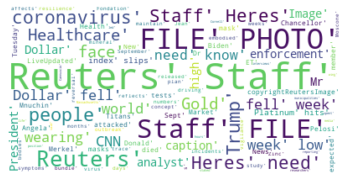

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()